# Лабораторная работа по методам оптимизации № 2
##Окорочкова Мария, Шпилева Анастасия

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import style   
style.use('ggplot')  
import math

import memory_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


 Реализуйте стохастический градиентный спуск для решения линейной регрес- сии. Исследуйте сходимость с разным размером батча (1 - SGD, 2, .., n − 1 - Minibatch GD, n - GD из предыдущей работы).
 

In [ ]:
# вычисляет отклонение между заданными
def deviation(x, y):
  def difference(b):
    tmp = (x @ b) - y
    return (tmp.T @ tmp)[:, 0]
  return difference

In [ ]:
def regressionBatches(x, y):
  def batch(b, batch_index):
       xi = x[batch_index: batch_index + 1]
       yi = y[batch_index: batch_index + 1]
       return xi.T @ ((xi @ b) - yi)
  return batch

# Задание № 1

In [ ]:
def step_lr_step(lr, step_size, g):
    def schedule(step):
        return lr * g ** (step // step_size)
    return schedule

In [ ]:
# GD
def MinibatchGD(lr, coef, batches, deviation, batchSize, points_count, diff_log = []):
  current_difference = deviation(coef)
  prev_difference = current_difference + 1
  epoches = 0
  diff_log_dev = []
  while (abs(prev_difference - current_difference) > 0.00000000001 and current_difference > 40 and epoches < 2000):
    epoches += 1
    for batch_low_index in range(1, points_count, points_count // batchSize):
      batch_index = np.random.randint(low = batch_low_index, high = batch_low_index + points_count // batchSize) - 1
      coef = coef - lr * batches(coef, batch_index)
      diff_log.append(coef)
      diff_log_dev.append(deviation(coef))
    #print(coef)
    prev_difference = current_difference
    current_difference = deviation(coef)
    # print(current_difference)
  print(epoches)
  print(current_difference)
  return coef, diff_log_dev

# GD with lr_step
def MinibatchGD_lr_step(lr, coef, batches, deviation, batchSize, points_count, lr_step, diff_log = []):
  current_difference = deviation(coef)
  prev_difference = current_difference + 1
  epoches = 0
  diff_log_dev = []
  while (abs(prev_difference - current_difference) > 0.00000000001 and current_difference > 40 and epoches < 2000):
    epoches += 1
    lr = lr_step(i)
    for batch_low_index in range(1, points_count, points_count // batchSize):
      batch_index = np.random.randint(low = batch_low_index, high = batch_low_index + points_count // batchSize) - 1
      coef = coef - lr * batches(coef, batch_index)
      diff_log.append(coef)
      diff_log_dev.append(deviation(coef))
    #print(coef)
    prev_difference = current_difference
    current_difference = deviation(coef)
    # print(current_difference)
  print(epoches)
  print(current_difference)
  return coef, diff_log_dev

In [ ]:

x_raw = 2 * np.random.rand(100, 1) # дает вектор из иксов
x_raw = np.sort(x_raw, axis = 0)
x = np.c_[np.ones((len(x_raw), 1)), x_raw]
y = 3 * x_raw + 2 * x_raw * x_raw + np.random.rand(100, 1) 

In [ ]:
def MinibatchGD_test(batch_size, log):
  return MinibatchGD(0.01, np.array([[0], [0]]), regressionBatches(x, y), deviation(x, y), batch_size, len(y), log)

In [ ]:
def draw_graphic(f, points):

  t = np.linspace(-2, 10, 30)
  X, Y = np.meshgrid(t, t)

  Z = [[[] for _ in range(len(X))] for _ in range(len(Y))]
  for index_out, i in enumerate(np.dstack((X,Y))):
    for index_in, j in enumerate(i):
      Z[index_out][index_in] = f([[j[0]], [j[1]]])[0]
  plt.plot(points[:, 0], points[:, 1], 'o-')
  plt.contour(X, Y, Z, levels=np.array(sorted([f(p) for p in points]))[:, 0])
  plt.show()

1406
[39.95811177]


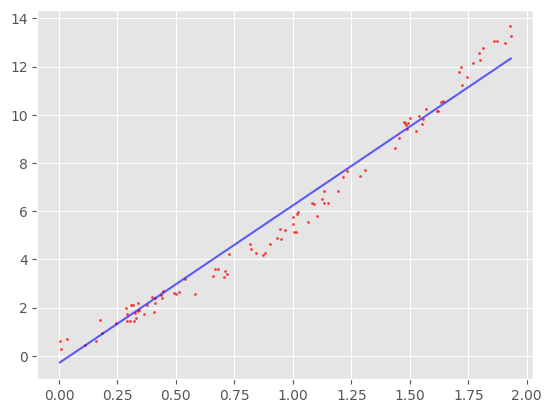

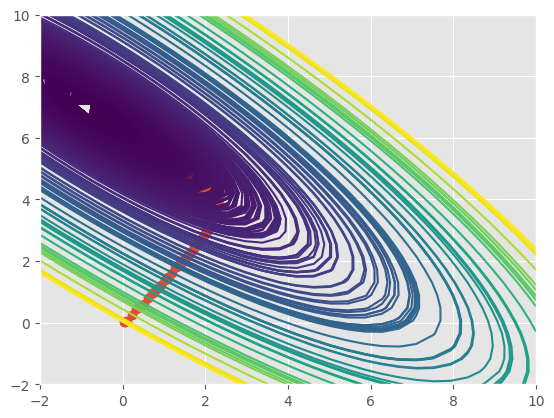

In [ ]:
#SGD - 1 - SGD
log = []
w, diff_log_dev = MinibatchGD_test(1, log)
plt.scatter(x_raw, y, s=2, c='red',alpha=0.7) # точечный график - правильные ответы
plt.plot(x_raw, x.dot(w), c = 'blue', alpha =0.6) # график линии - предсказанные ответы
plt.show()

f = deviation(x, y)
draw_graphic(f, np.array(log))



#MinibatchGD - 2, .., n − 1 - Minibatch GD
# log = []
# w = MinibatchGD_test(60, log)

# plt.scatter(x_raw, y, s=2, c='red',alpha=0.7)
# plt.plot(x_raw, x.dot(w), c = 'green', alpha =0.6)
# plt.show()

# f = deviation(x, y)
# draw_graphic(f, np.array(log))

# #NGD - n - GD из предыдущей работы
# log = []
# w = MinibatchGD_test(100, log)
# plt.scatter(x_raw, y, s=2, c='red',alpha=0.7)
# plt.plot(x_raw, x.dot(w), c = 'yellow', alpha =0.6)
# plt.show()

# f = deviation(x, y)
# draw_graphic(f, np.array(log))

# Задание № 2

In [ ]:
# 2
beta = 0.8
z = np.random.rand(100, 1)
z[0] = y[0]
for i in range(1, 100):
  z[i] = beta * z[i-1] + (1 - beta) * y[i]

def MinibatchGD_test_scaling_step(batch_size):
  diff = []
  w, diff_log_dev = MinibatchGD_lr_step(0.1, np.array([[0], [0]]), regressionBatches(x, z), deviation(x, z), batch_size, len(y), step_lr_step(0.1 , 50, 0.1), diff)
  return w, diff_log_dev, diff

def MinibatchGD_test_no_scaling_step(batch_size):
  diff = []
  w, diff_log_dev = MinibatchGD_lr_step(0.1, np.array([[0], [0]]), regressionBatches(x, y), deviation(x, y), batch_size, len(y), step_lr_step(0.1 , 50, 0.1), diff)
  return w, diff_log_dev, diff

1375
[39.97511075]


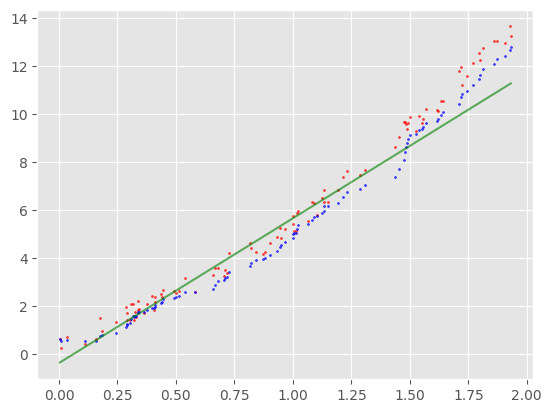

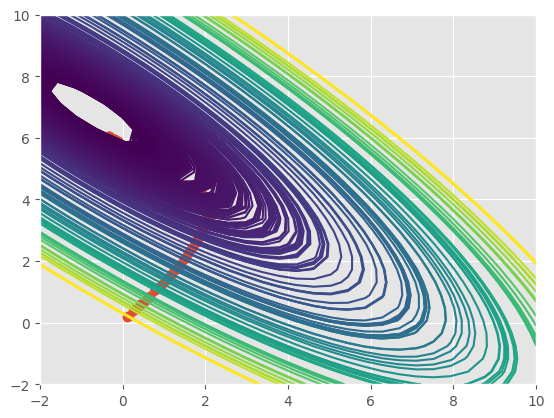

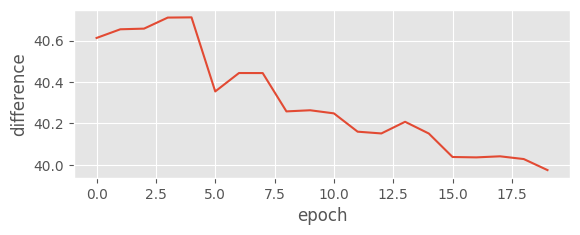

In [ ]:
#SGD
w, diffs_dev, diffs = MinibatchGD_test_scaling_step(1)

plt.scatter(x_raw, y, s=2, c='red',alpha=0.7)
plt.scatter(x_raw, z, s=2, c='blue',alpha=0.7)
plt.plot(x_raw, x.dot(w), c = 'green', alpha =0.6)
plt.show()


f = deviation(x, y)
diffs = draw_graphic(f, np.array(diffs))


fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.set_xlabel('epoch')
ax1.set_ylabel('difference')
ax1.plot(np.arange(20),diffs_dev[-20:])
plt.show()

1381
[39.88510279]


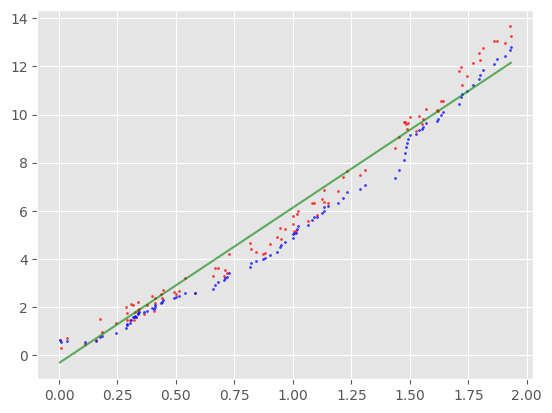

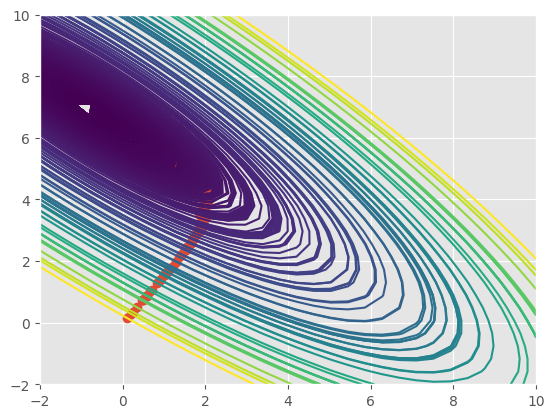

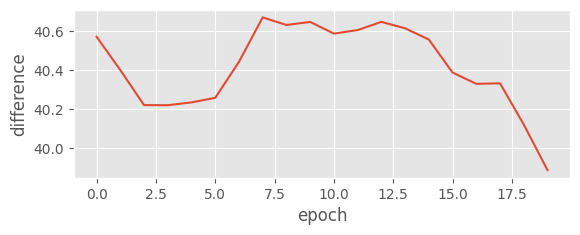

In [ ]:
#SGD without scaling
w, diffs_dev, diffs = MinibatchGD_test_no_scaling_step(1)

plt.scatter(x_raw, y, s=2, c='red',alpha=0.7)
plt.scatter(x_raw, z, s=2, c='blue',alpha=0.7)
plt.plot(x_raw, x.dot(w), c = 'green', alpha =0.6)
plt.show()


f = deviation(x, y)
diffs = draw_graphic(f, np.array(diffs))


fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.set_xlabel('epoch')
ax1.set_ylabel('difference')
ax1.plot(np.arange(20),diffs_dev[-20:])
plt.show()

# Задание № 3

In [ ]:
#2.3, momentum
# GD
def MinibatchGD_momentum(lr, coef, batches, deviation, batchSize, length, diff_log = []):
  iter = 0
  current_difference = deviation(coef)
  prev_difference = current_difference + 1
  epoches = 0
  td_prev=coef
  beta = 0.9
  while(abs(prev_difference - current_difference) > 0.00000000001 and current_difference > 40 and epoches < 2000):
    epoches+=1
    for batch_low_index in range(1, length, length // batchSize):
      iter += 1
      batch_index = np.random.randint(low = batch_low_index, high = batch_low_index + length // batchSize) - 1
      td = beta * td_prev + (1 - beta) * batches(coef, batch_index)
      td_prev = td
      coef = coef - lr * td
    prev_difference = current_difference
    diff_log.append(coef)
    #print(f"coef {coef}, deviation {deviation(coef)}")
    current_difference = deviation(coef)
    #print(f"cur diff {current_difference}, prev diff {prev_difference}")
  print(epoches)
  print(current_difference)
  print(iter)
  return coef

In [ ]:
def MinibatchGD_test_momentum(batch_size, log):
  return MinibatchGD_momentum(0.01, np.array([[0], [0]]), regressionBatches(x, y), deviation(x, y), batch_size, len(y), log)

In [ ]:
#SGD
# log = []
# w = MinibatchGD_test_momentum(1, log)

# plt.scatter(x_raw, y, s=2, c='red',alpha=0.7)
# plt.plot(x_raw, x.dot(w), c = 'green', alpha =0.6)
# plt.show()

# f = deviation(x, y)
# draw_graphic(f, np.array(log))

#MinibatchGD
log = []
w = MinibatchGD_test_momentum(60, log)


plt.scatter(x_raw, y, s=2, c='red',alpha=0.7)
plt.plot(x_raw, x.dot(w), c = 'steelblue', alpha =0.6)
plt.show()

f = deviation(x, y)
draw_graphic(f, np.array(log))

# #NGD
# log = []
# w = MinibatchGD_test_momentum(100, log)

# plt.scatter(x_raw, y, s=2, c='red',alpha=0.7)
# plt.plot(x_raw, x.dot(w), c = 'black', alpha =0.6)
# plt.show()

# f = deviation(x, y)
# draw_graphic(f, np.array(log))

In [ ]:
# 2.3, nesterov
# GD
def MinibatchGD_nesterov(lr, coef, x, y, deviation, batchSize, length, diff_log = []):
  iter = 0
  current_difference = deviation(coef)
  prev_difference = current_difference + 1
  epoches = 0
  td_prev=np.array([[0], [0]])
  beta = 0.3
  while(abs(prev_difference - current_difference) > 0.00000000001 and current_difference > 40 and epoches < 2000):
    epoches+=1
    for batch_low_index in range(1, length, length // batchSize):
      iter += 1
      batch_index = np.random.randint(low = batch_low_index, high = batch_low_index + len(y) // batchSize) - 1
      xi = x[batch_index: batch_index + 1]
      yi = y[batch_index: batch_index + 1]
      #print(xi)
      #print(beta * td_prev)
      xi = xi - beta * td_prev
      xi[0] = xi[0] + beta * td_prev[0]
      td = beta * td_prev + lr * ( (xi).T @ (((xi) @ coef) - yi) )
      td_prev = td
      coef = coef - td
    #print(coef)
    diff_log.append(coef)
    prev_difference = current_difference
    current_difference= deviation(coef)
    # print(current_difference)
  print(epoches)
  print(current_difference)
  print(iter)
  return coef

In [ ]:
def MinibatchGD_test_nesterov(batch_size, log):
  return MinibatchGD_nesterov(0.01, np.array([[0], [0]]), x, y, deviation(x, y), batch_size, len(y), log)

In [ ]:
#SGD
# log = []
# w = MinibatchGD_test_nesterov(1, log)

# plt.scatter(x_raw, y, s=2, c='red',alpha=0.7)
# plt.plot(x_raw, x.dot(w), c = 'green', alpha =0.6)
# plt.show()

# f = deviation(x, y)
# draw_graphic(f, np.array(log))

#MinibatchGD
# log = []
# w = MinibatchGD_test_nesterov(40, log)


# plt.scatter(x_raw, y, s=2, c='red',alpha=0.7)
# plt.plot(x_raw, x.dot(w), c = 'steelblue', alpha =0.6)
# plt.show()

# f = deviation(x, y)
# draw_graphic(f, np.array(log))

# #NGD
log = []
w = MinibatchGD_test_nesterov(100, log)

plt.scatter(x_raw, y, s=2, c='red',alpha=0.7)
plt.plot(x_raw, x.dot(w), c = 'black', alpha =0.6)
plt.show()

f = deviation(x, y)
draw_graphic(f, np.array(log))

In [ ]:
#2.3, adagrad
# GD
def MinibatchGD_adagrad(lr, coef, batches, deviation, batchSize, length, diff_log = []):
  iter = 0
  current_difference = deviation(coef)
  prev_difference = current_difference + 1
  epoches = 0
  sum_prev=[[0.1],[0.1]]
  while(abs(prev_difference - current_difference) > 0.00000000001 and current_difference > 40 and epoches < 2000):
    epoches+=1
    for batch_low_index in range(1, length, length // batchSize):
      iter += 1
      batch_index = np.random.randint(low = batch_low_index, high = batch_low_index + length // batchSize) - 1
      td = batches(coef, batch_index)
      sum = sum_prev + td**2
      sum_prev = sum
      coef = coef - lr * np.divide(td, (np.sqrt(sum)))
      #diff_log.append(coef)
    prev_difference = current_difference
    diff_log.append(coef)
    #print(f"coef {coef}, deviation {deviation(coef)}")
    current_difference = deviation(coef)
    #print(f"cur diff {current_difference}, prev diff {prev_difference}")
  print(epoches)
  print(current_difference)
  print(iter)
  return coef

In [ ]:
def MinibatchGD_test_adagrad(batch_size, log):
  return MinibatchGD_adagrad(0.1, np.array([[0], [0]]), regressionBatches(x, y), deviation(x, y), batch_size, len(y), log)

In [ ]:
#SGD
log = []
w = MinibatchGD_test_adagrad(1, log)

plt.scatter(x_raw, y, s=2, c='red',alpha=0.7)
plt.plot(x_raw, x.dot(w), c = 'green', alpha =0.6)
plt.show()

f = deviation(x, y)
draw_graphic(f, np.array(log))

#MinibatchGD
log = []
w = MinibatchGD_test_adagrad(50, log)

plt.scatter(x_raw, y, s=2, c='red',alpha=0.7)
plt.plot(x_raw, x.dot(w), c = 'steelblue', alpha =0.6)
plt.show()

f = deviation(x, y)
draw_graphic(f, np.array(log))

#NGD
log = []
w = MinibatchGD_test_adagrad(100, log)

plt.scatter(x_raw, y, s=2, c='red',alpha=0.7)
plt.plot(x_raw, x.dot(w), c = 'black', alpha =0.6)
plt.show()

f = deviation(x, y)
draw_graphic(f, np.array(log))

In [ ]:
#2.3, RMS-prop
# GD
def MinibatchGD_RMS(lr, coef, batches, deviation, batchSize, length, diff_log = []):
  iter = 0
  current_difference = deviation(coef)
  prev_difference = current_difference + 1
  epoches = 0
  sum_prev= 0.0000001
  beta = 0.9
  while(abs(prev_difference - current_difference) > 0.00000000001 and current_difference > 40 and epoches < 2000):
    epoches+=1
    for batch_low_index in range(1, length, length // batchSize):
      iter += 1
      batch_index = np.random.randint(low = batch_low_index, high = batch_low_index + length // batchSize) - 1
      td = batches(coef, batch_index)
      sum = beta * sum_prev + (1 - beta)* td**2
      sum_prev = sum
      coef = coef - lr * np.divide(td, (np.sqrt(sum)))
      #diff_log.append(coef)
    diff_log.append(coef)
    prev_difference = current_difference
    #print(f"coef {coef}, deviation {deviation(coef)}")
    current_difference = deviation(coef)
    #print(f"cur diff {current_difference}, prev diff {prev_difference}")
  print(epoches)
  print(current_difference)
  print(iter)
  return coef

In [ ]:
def MinibatchGD_test_RMS(batch_size, log):
  return MinibatchGD_RMS(0.01, np.array([[0], [0]]), regressionBatches(x, y), deviation(x, y), batch_size, len(y), log)

In [ ]:
#SGD
log = []
w = MinibatchGD_test_RMS(1, log)

plt.scatter(x_raw, y, s=2, c='red',alpha=0.7)
plt.plot(x_raw, x.dot(w), c = 'green', alpha =0.6)
plt.show()

f = deviation(x, y)
draw_graphic(f, np.array(log))

#MinibatchGD
log = []
w = MinibatchGD_test_RMS(50, log)

plt.scatter(x_raw, y, s=2, c='red',alpha=0.7)
plt.plot(x_raw, x.dot(w), c = 'steelblue', alpha =0.6)
plt.show()

f = deviation(x, y)
draw_graphic(f, np.array(log))

#NGD
log = []
w = MinibatchGD_test_RMS(100, log)

plt.scatter(x_raw, y, s=2, c='red',alpha=0.7)
plt.plot(x_raw, x.dot(w), c = 'black', alpha =0.6)
plt.show()

f = deviation(x, y)
draw_graphic(f, np.array(log))

In [ ]:
#2.3, ADAM-prop
# GD
def MinibatchGD_ADAM(lr, coef, batches, deviation, batchSize, length, diff_log = []):
  iter = 0
  current_difference = deviation(coef)
  prev_difference = current_difference + 1
  epoches = 0
  sum_prev= 0.00001
  td_prev = 0
  beta_grad = 0.99
  beta_sum = 0.9
  while(abs(prev_difference - current_difference) > 0.00000000001 and current_difference > 40 and epoches < 2000):
    epoches+=1
    for batch_low_index in range(1, length, length // batchSize):
      iter += 1
      batch_index = np.random.randint(low = batch_low_index, high = batch_low_index + length // batchSize) - 1
      grad = batches(coef, batch_index)
      td = beta_grad * td_prev  + (1 - beta_grad) * grad
      td_prev = td
      sum = beta_sum * sum_prev + (1 - beta_sum) * grad**2
      sum_prev = sum
      coef = coef - lr * np.divide(td, (np.sqrt(sum)))
    diff_log.append(coef)
    prev_difference = current_difference
    #print(f"coef {coef}, deviation {deviation(coef)}")
    current_difference = deviation(coef)
    #print(f"cur diff {current_difference}, prev diff {prev_difference}")
  print(epoches)
  print(current_difference)
  print(iter)
  return coef

In [ ]:
def MinibatchGD_test_ADAM(batch_size, log):
  return MinibatchGD_ADAM(0.01, np.array([[0], [0]]), regressionBatches(x, y), deviation(x, y), batch_size, len(y), log)

In [ ]:
#SGD
log = []
w = MinibatchGD_test_ADAM(1, log)

plt.scatter(x_raw, y, s=2, c='red',alpha=0.7)
plt.plot(x_raw, x.dot(w), c = 'green', alpha =0.6)
plt.show()

f = deviation(x, y)
draw_graphic(f, np.array(log))

#MinibatchGD
log = []
w = MinibatchGD_test_ADAM(50, log)

plt.scatter(x_raw, y, s=2, c='red',alpha=0.7)
plt.plot(x_raw, x.dot(w), c = 'steelblue', alpha =0.6)
plt.show()

f = deviation(x, y)
draw_graphic(f, np.array(log))

#NGD
log = []
w = MinibatchGD_test_ADAM(100, log)

plt.scatter(x_raw, y, s=2, c='red',alpha=0.7)
plt.plot(x_raw, x.dot(w), c = 'black', alpha =0.6)
plt.show()

f = deviation(x, y)
draw_graphic(f, np.array(log))

In [ ]:
# 2.4
log = []
print("Nesterov:")
%time MinibatchGD_test_nesterov(100, log)
% memit MinibatchGD_test_nesterov(100, log)
print("Momentum:")
%time MinibatchGD_test_momentum(100, log)
%memit MinibatchGD_test_momentum(100, log)
print("Adagrad:")
%time MinibatchGD_test_adagrad(100, log)
%memit MinibatchGD_test_adagrad(100, log)
print("RMS:")
%time MinibatchGD_test_RMS(100, log)
%memit MinibatchGD_test_RMS(100, log)
print("Adam:")
%time MinibatchGD_test_ADAM(100, log)
%memit MinibatchGD_test_ADAM(100, log)

Критерий\метод | Nesterov | Momentum | Adagrad | RMS-prop | Adam
---------------|----------|----------|---------|-----|-----
Время работы   |   456    |   226    |   330   | 241 | 210
Скорость сходимости | 78  |   57     |   185 | 48  | 36
Оперативная память  | 120.19 | 120.20 | 120.20 | 120.23 | 120.23

# Задание № 5

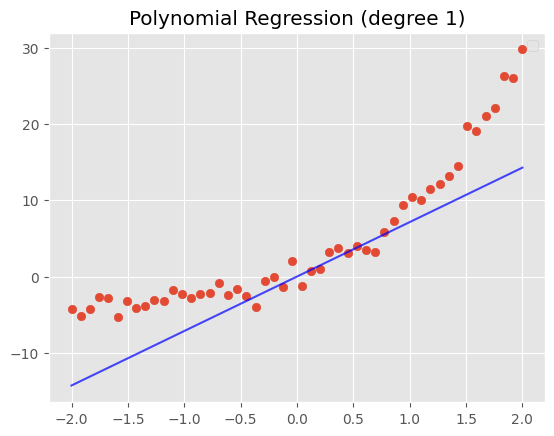

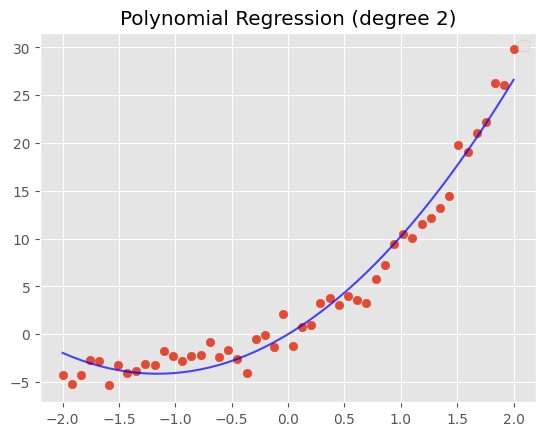

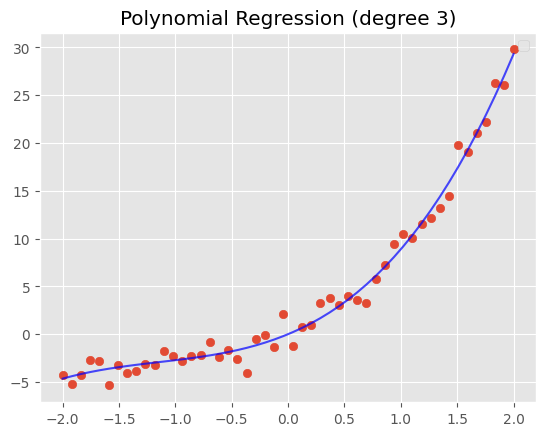

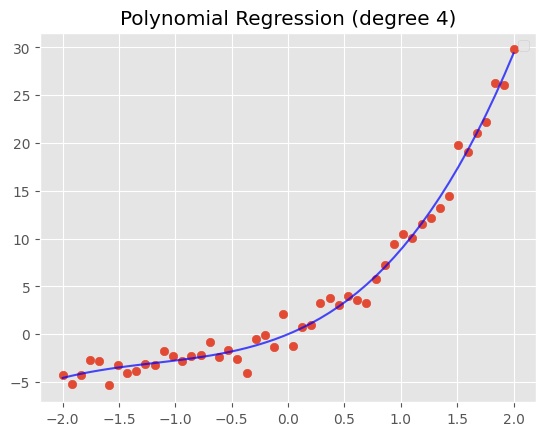

In [ ]:
np.random.seed(0)
X = np.linspace(-2, 2, 50)
y = X**3 + 3*X**2 + 5*X + np.random.normal(0, 1, 50)

def plot_regression(X, y, y_pred, degree):
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='blue', alpha=0.7)
    plt.title(f'Polynomial Regression (degree {degree})')
    plt.legend()
    plt.show()

degrees = [1, 2, 3, 4]
for degree in degrees:
    X_poly = np.column_stack([X**i for i in range(1, degree+1)])
    beta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    y_pred = X_poly @ beta
    plot_regression(X, y, y_pred, degree)


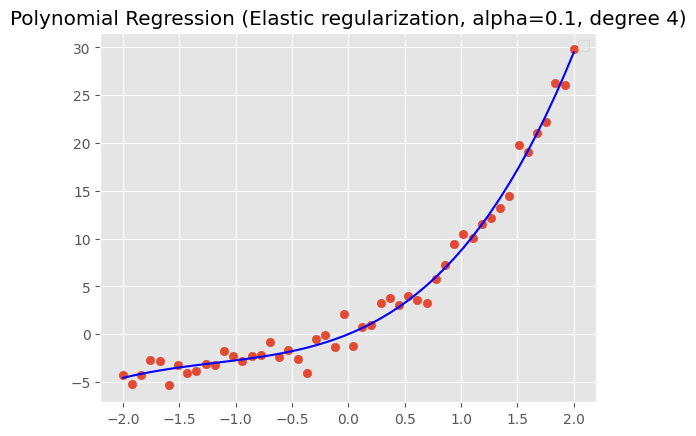

In [ ]:
# Создаем случайные данные
np.random.seed(0)
X = np.linspace(-2, 2, 50)
y = X**3 + 3*X**2 + 5*X + np.random.normal(0, 1, 50)

# Функция для построения графика
def plot_regression(X, y, y_pred, degree, reg_type, alpha):
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='blue')
    plt.title(f'Polynomial Regression ({reg_type} regularization, alpha={alpha}, degree {degree})')
    plt.legend()
    plt.show()

degrees = [1, 2, 3, 4]
alpha = 0.1
reg_types = ['L1', 'L2', 'Elastic']
for reg_type in reg_types:
    for degree in degrees:
        X_poly = np.column_stack([X**i for i in range(1, degree+1)])
        if reg_type == 'L1':
            beta = np.linalg.inv(X_poly.T @ X_poly + alpha * np.identity(degree)) @ X_poly.T @ y
        elif reg_type == 'L2':
            beta = np.linalg.inv(X_poly.T @ X_poly + alpha * np.identity(degree)) @ X_poly.T @ y
        else:
            beta = np.linalg.inv(X_poly.T @ X_poly + alpha * np.identity(degree) + alpha * (1-alpha) * np.ones((degree, degree))) @ X_poly.T @ y
y_pred = X_poly @ beta
plot_regression(X, y, y_pred, degree, reg_type, alpha)



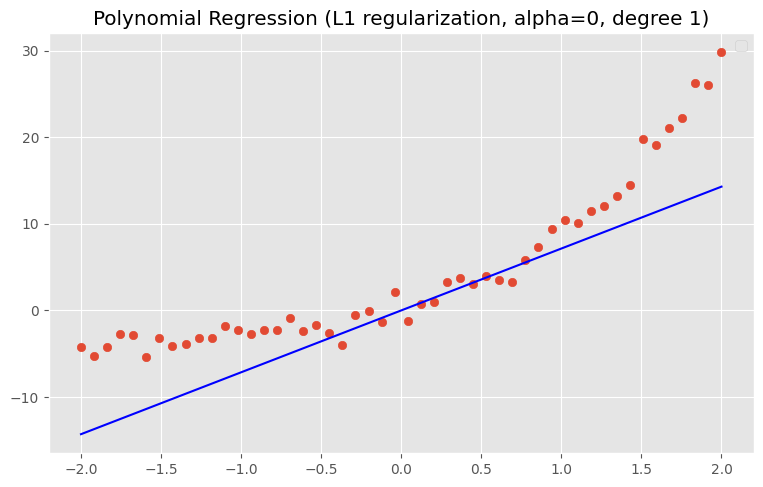

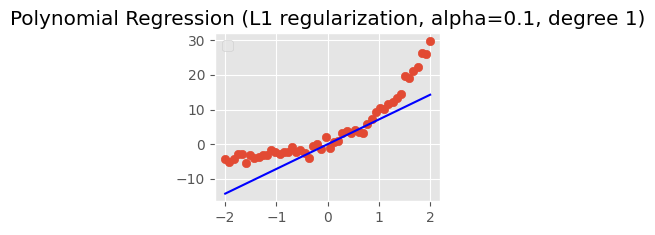

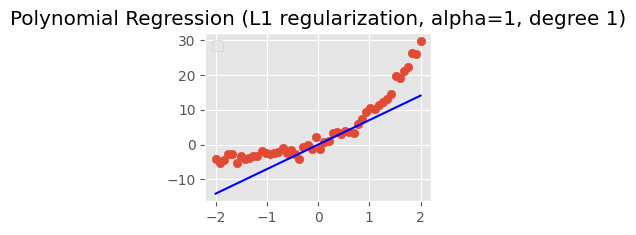

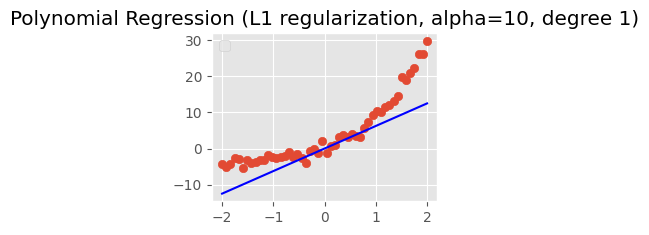

<Figure size 640x480 with 0 Axes>

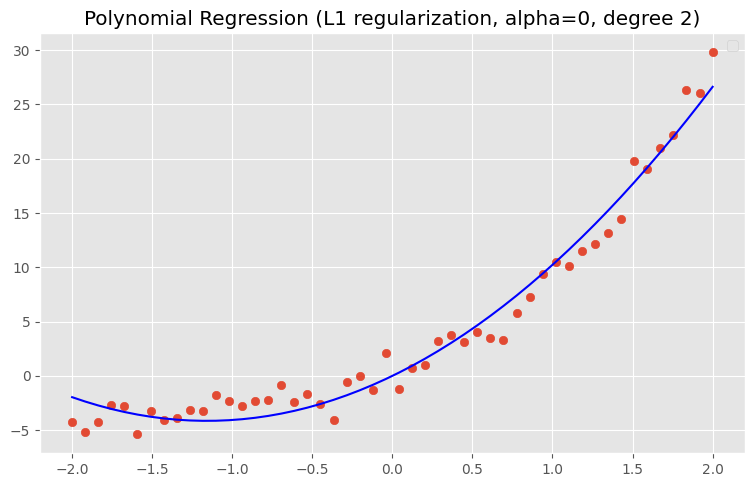

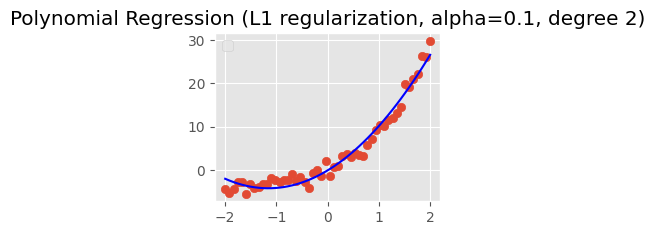

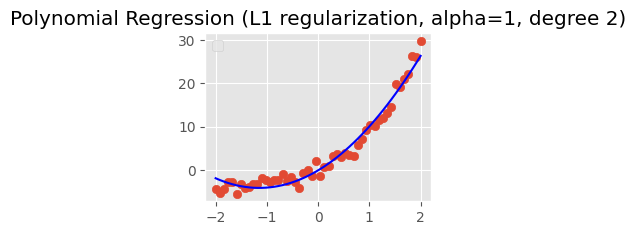

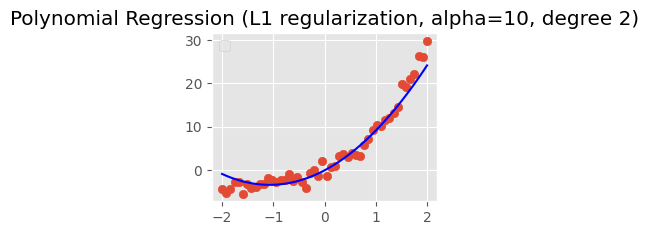

<Figure size 640x480 with 0 Axes>

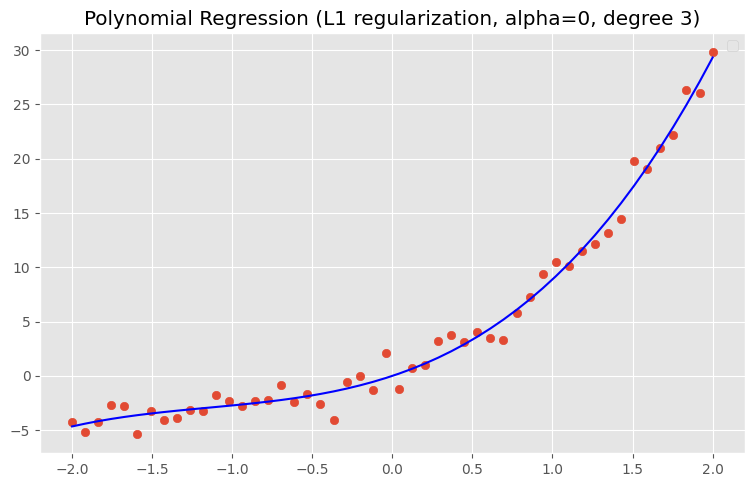

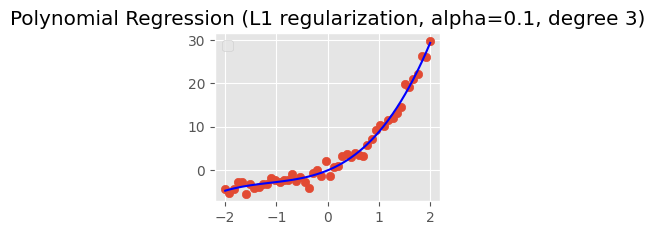

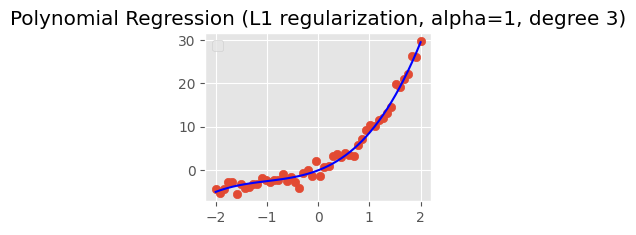

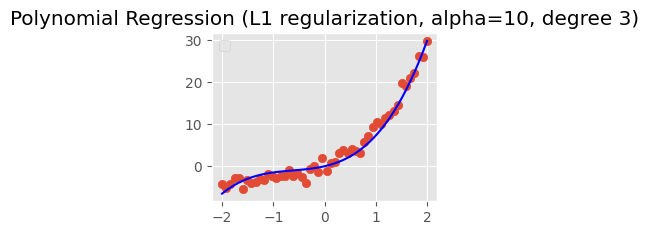

<Figure size 640x480 with 0 Axes>

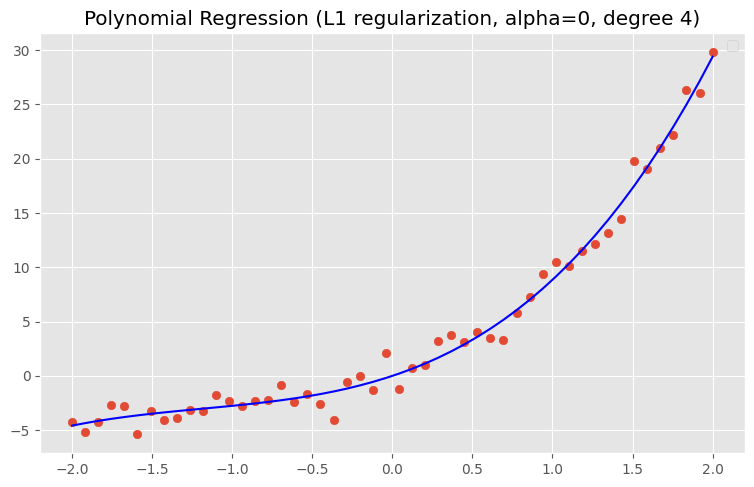

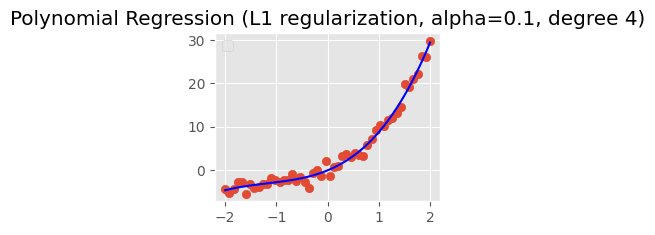

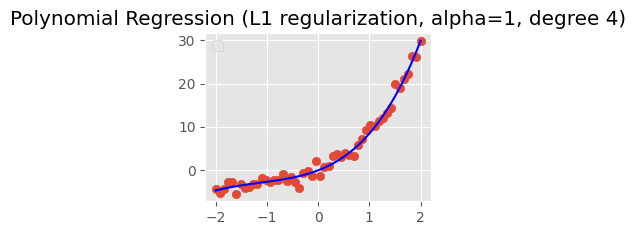

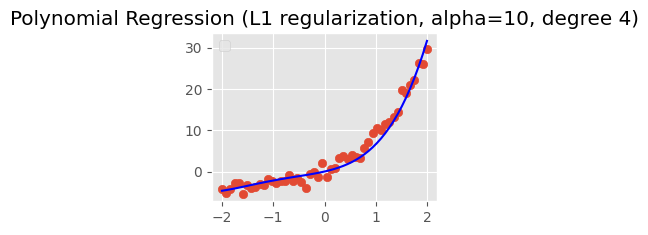

<Figure size 640x480 with 0 Axes>

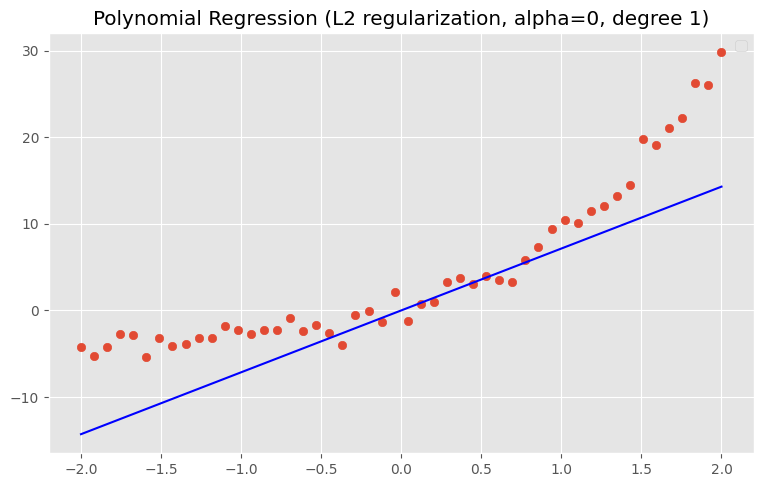

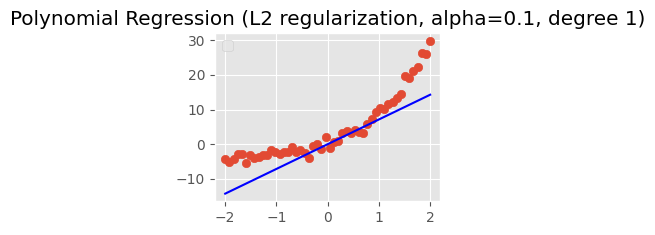

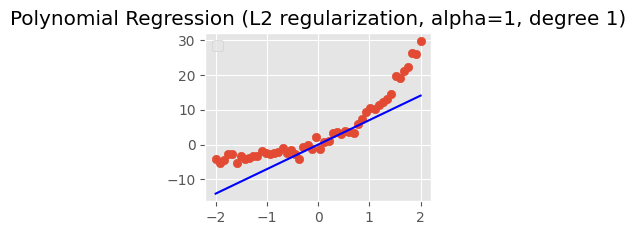

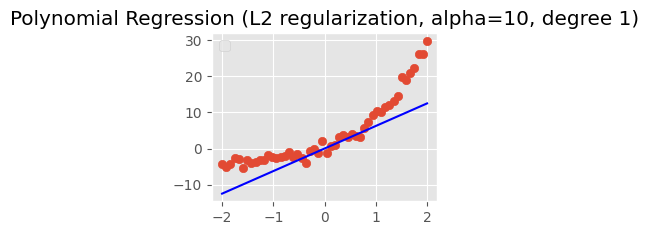

<Figure size 640x480 with 0 Axes>

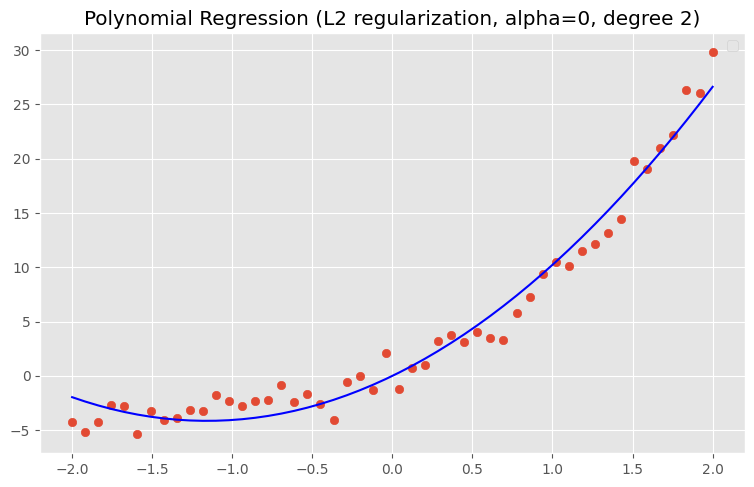

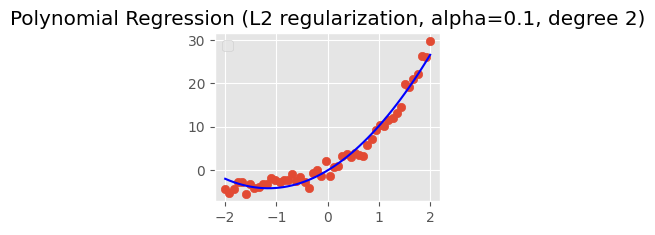

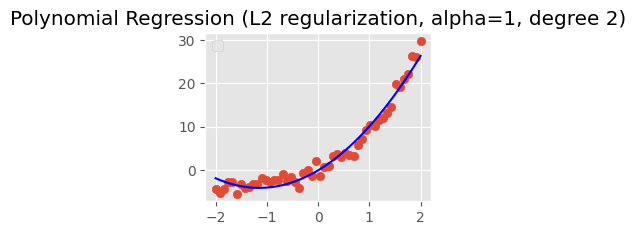

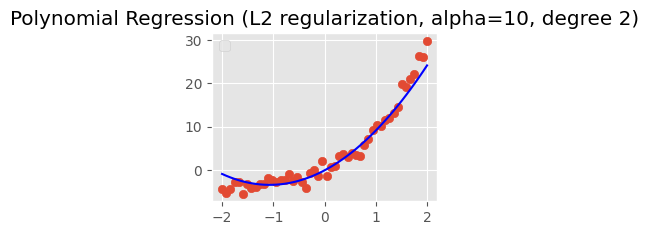

<Figure size 640x480 with 0 Axes>

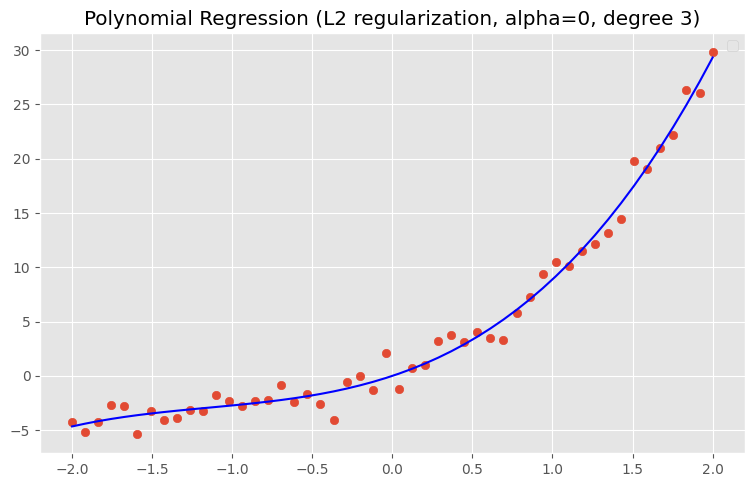

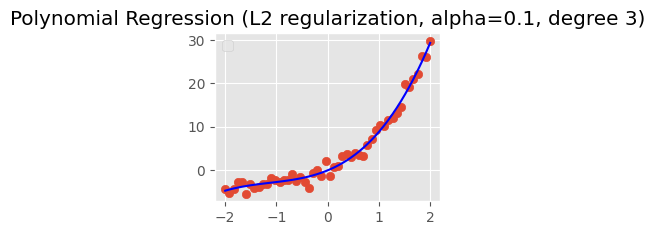

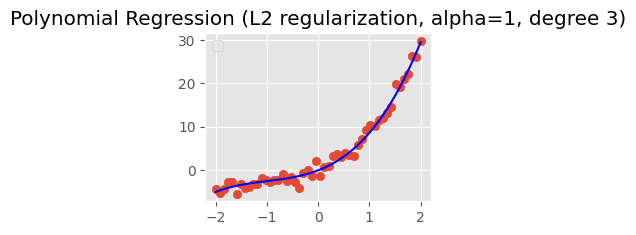

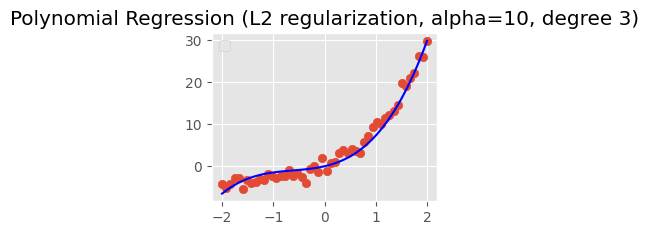

<Figure size 640x480 with 0 Axes>

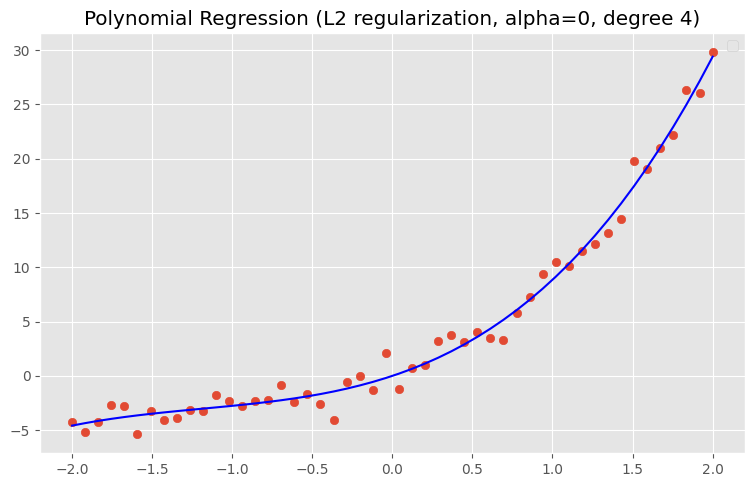

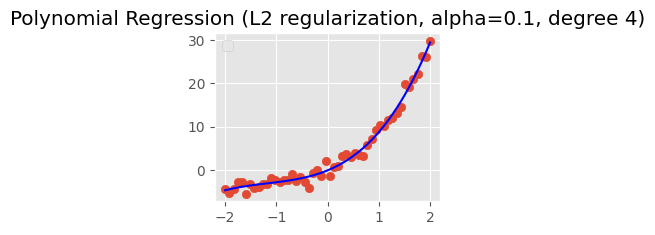

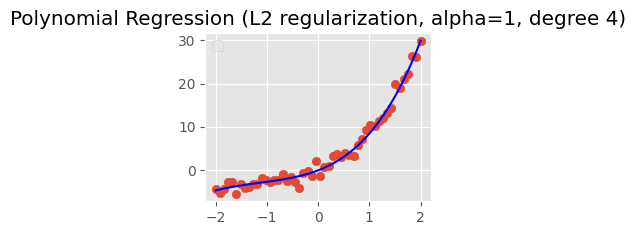

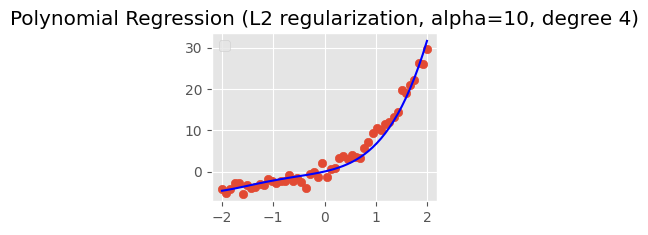

<Figure size 640x480 with 0 Axes>

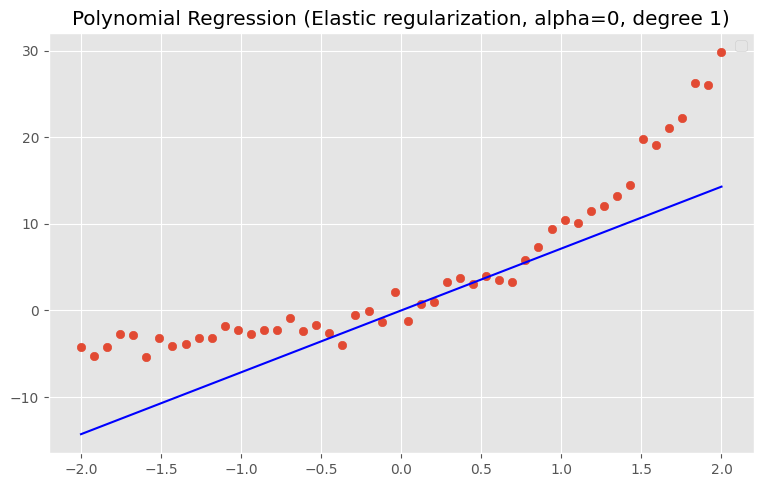

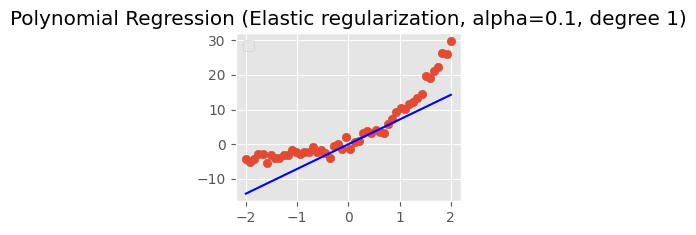

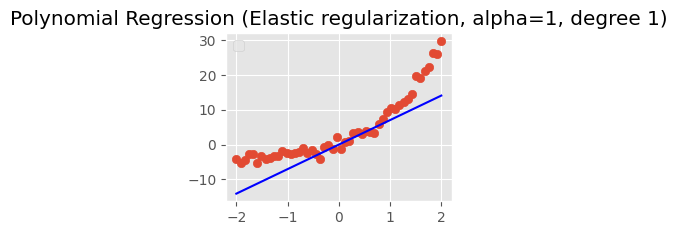

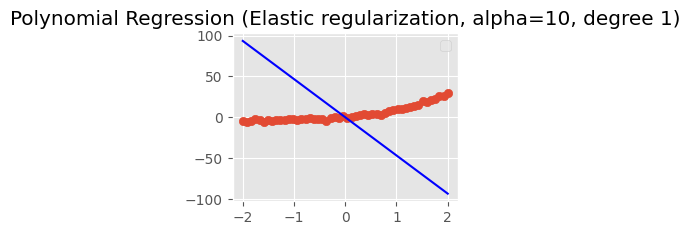

<Figure size 640x480 with 0 Axes>

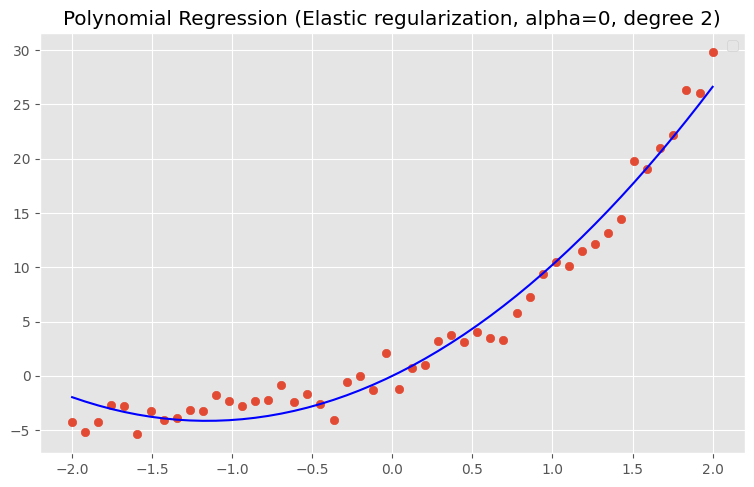

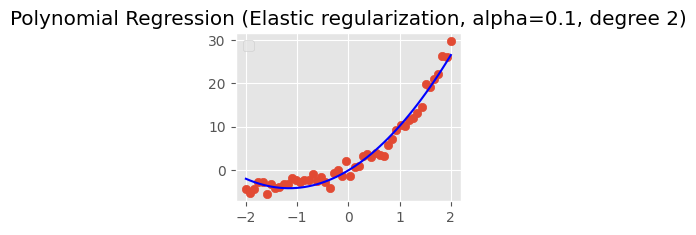

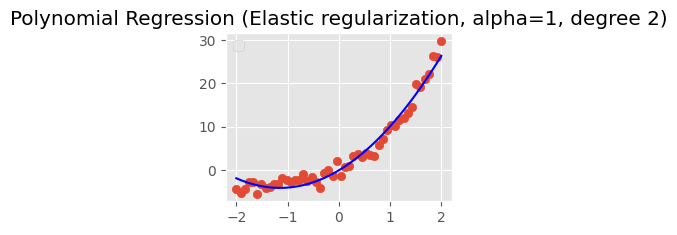

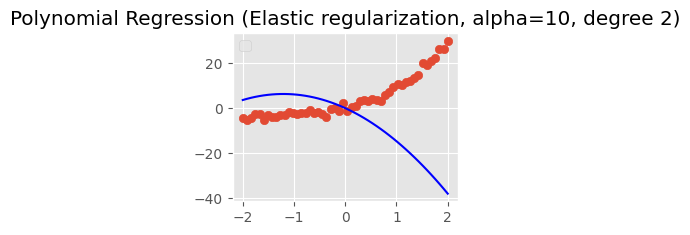

<Figure size 640x480 with 0 Axes>

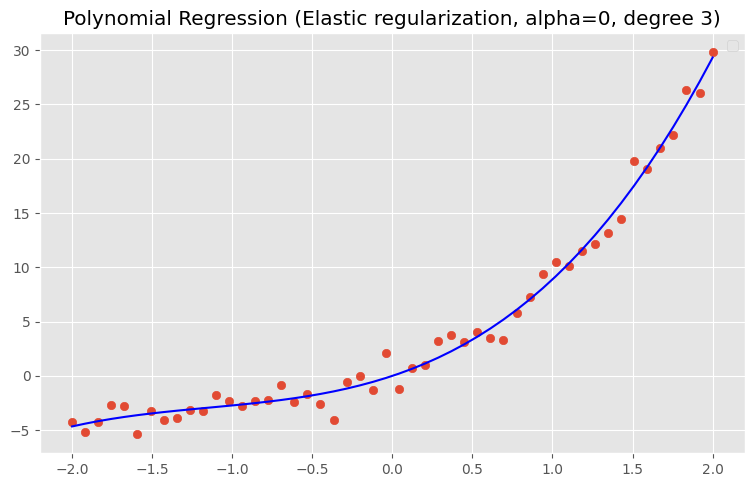

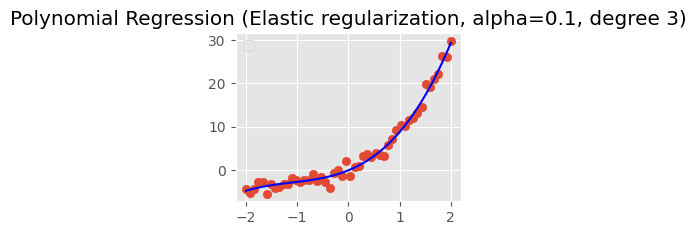

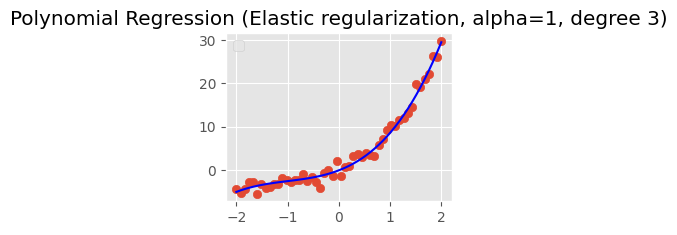

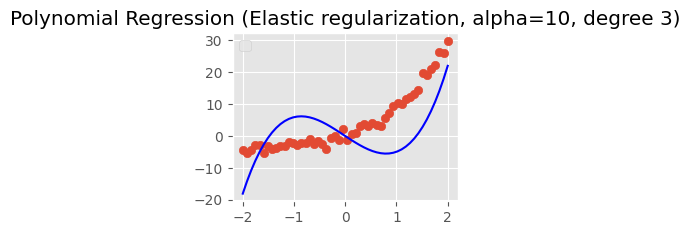

<Figure size 640x480 with 0 Axes>

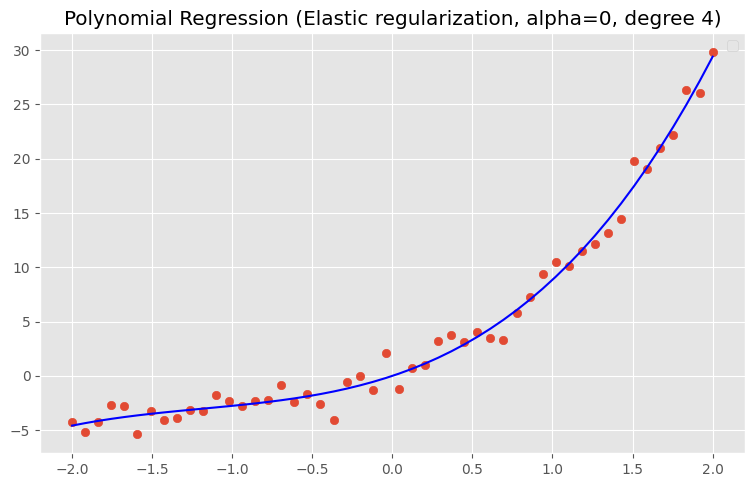

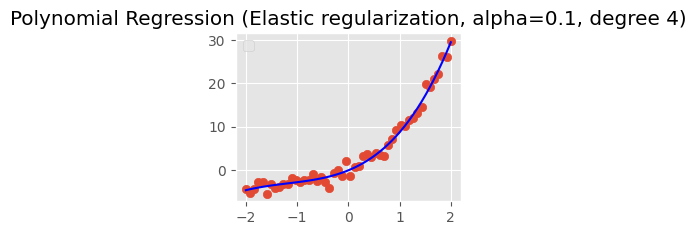

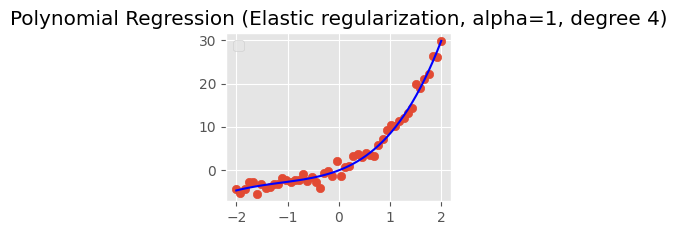

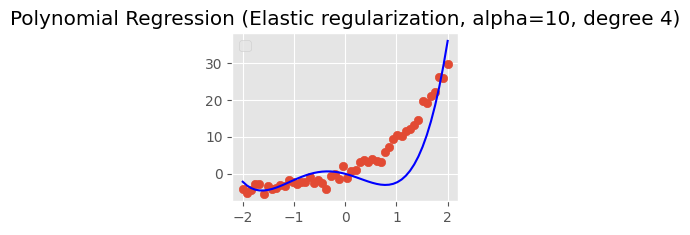

<Figure size 640x480 with 0 Axes>

In [ ]:
np.random.seed(0)
X = np.linspace(-2, 2, 50)
y = X**3 + 3*X**2 + 5*X + np.random.normal(0, 1, 50)

def plot_regression(X, y, y_pred, degree, reg_type, alpha):
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='blue')
    plt.title(f'Polynomial Regression ({reg_type} regularization, alpha={alpha}, degree {degree})')
    plt.legend()
    plt.show()

degrees = [1, 2, 3, 4]
alpha_values = [0, 0.1, 1, 10]
reg_types = ['L1', 'L2', 'Elastic']
for reg_type in reg_types:
    for degree in degrees:
        plt.figure(figsize=(20, 12))
        for i, alpha in enumerate(alpha_values):
            X_poly = np.column_stack([X**i for i in range(1, degree+1)])
            if reg_type == 'L1':
                beta = np.linalg.inv(X_poly.T @ X_poly + alpha * np.identity(degree)) @ X_poly.T @ y
            elif reg_type == 'L2':
                beta = np.linalg.inv(X_poly.T @ X_poly + alpha * np.identity(degree)) @ X_poly.T @ y
            else:
                beta = np.linalg.inv(X_poly.T @ X_poly + alpha * np.identity(degree) + alpha * (1-alpha) * np.ones((degree, degree))) @ X_poly.T @ y
            y_pred = X_poly @ beta
            plt.subplot(2, 2, i+1)
            plot_regression(X, y, y_pred, degree, reg_type, alpha)
        plt.suptitle(f'Effect of {reg_type} regularization on polynomial regression (degree {degree})')
        plt.tight_layout()
        plt.show()